In [ ]:
import requests

url = "https://www.openml.org/data/download/22102255/dataset"
r = requests.get(url, allow_redirects=True)

In [ ]:
with open("dataset.txt", "wb") as f:
    f.write(r.content)

In [ ]:
import pandas as pd

In [ ]:
data = []

with open("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@") or line.startswith("%") or line == "":
            continue
        data.append(line)

In [ ]:
columns = []

with open("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])

In [ ]:
with open("df.csv", "w") as f:
    f.write(",".join(columns))
    f.write("\n")
    f.write("\n".join(data))

In [ ]:
df = pd.read_csv("df.csv")
df.columns = columns

In [ ]:
df["t_win"] = df.round_winner.astype("category").cat.codes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df[columns+["t_win"]].corr()
print(correlations['t_win'].apply(abs).sort_values(ascending=False).iloc[:25])

selected_columns = []

for col in columns+['t_win']:
    try:
        if abs(correlations[col]['t_win']) > 0.15:
            selected_columns.append(col)
    except KeyError:
        pass

df_selected = df[selected_columns]

<ipython-input-9-1d518498bf79>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df[columns+["t_win"]].corr()


t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

In [ ]:
df_selected

,bomb_planted,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,...,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,False,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,False,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,False,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,True,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,...,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,False,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,...,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1


In [ ]:
print(len(df_selected.columns))

21


0.18710090782092895


<Axes: >

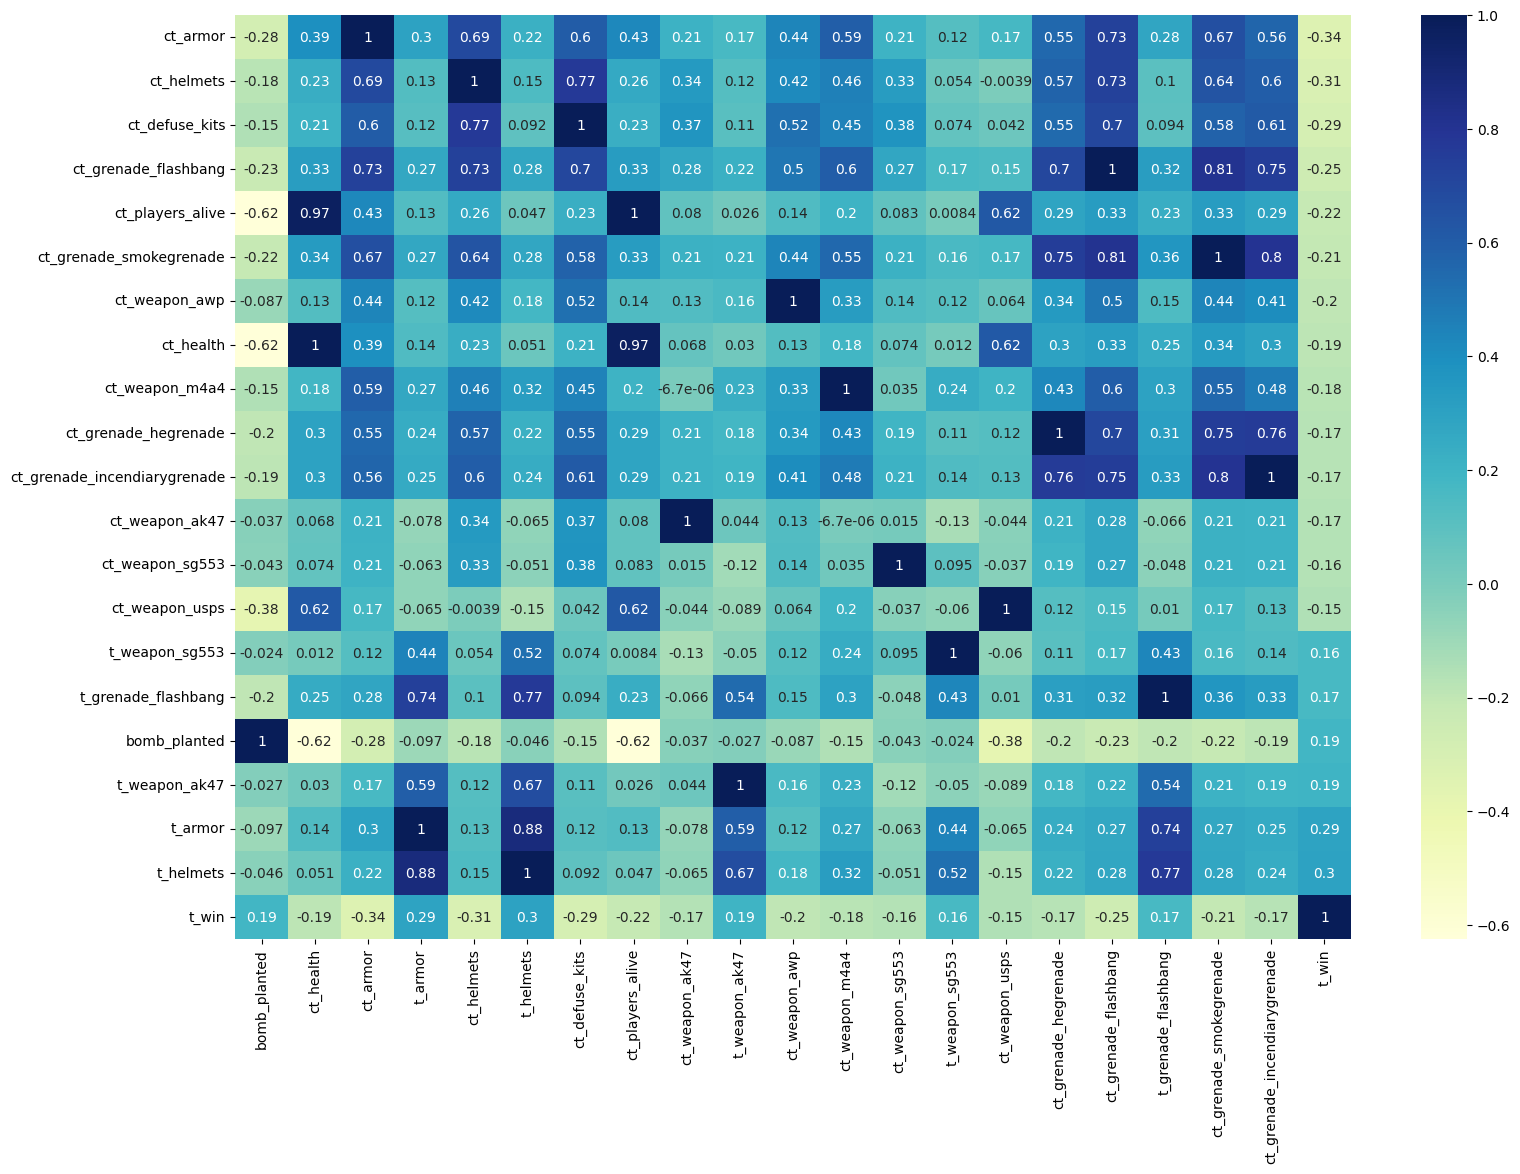

In [ ]:
print(correlations['bomb_planted']['t_win'])

plt.figure(figsize=(18, 12))
sns.heatmap(df_selected.corr().sort_values(by='t_win'), annot=True, cmap="YlGnBu")

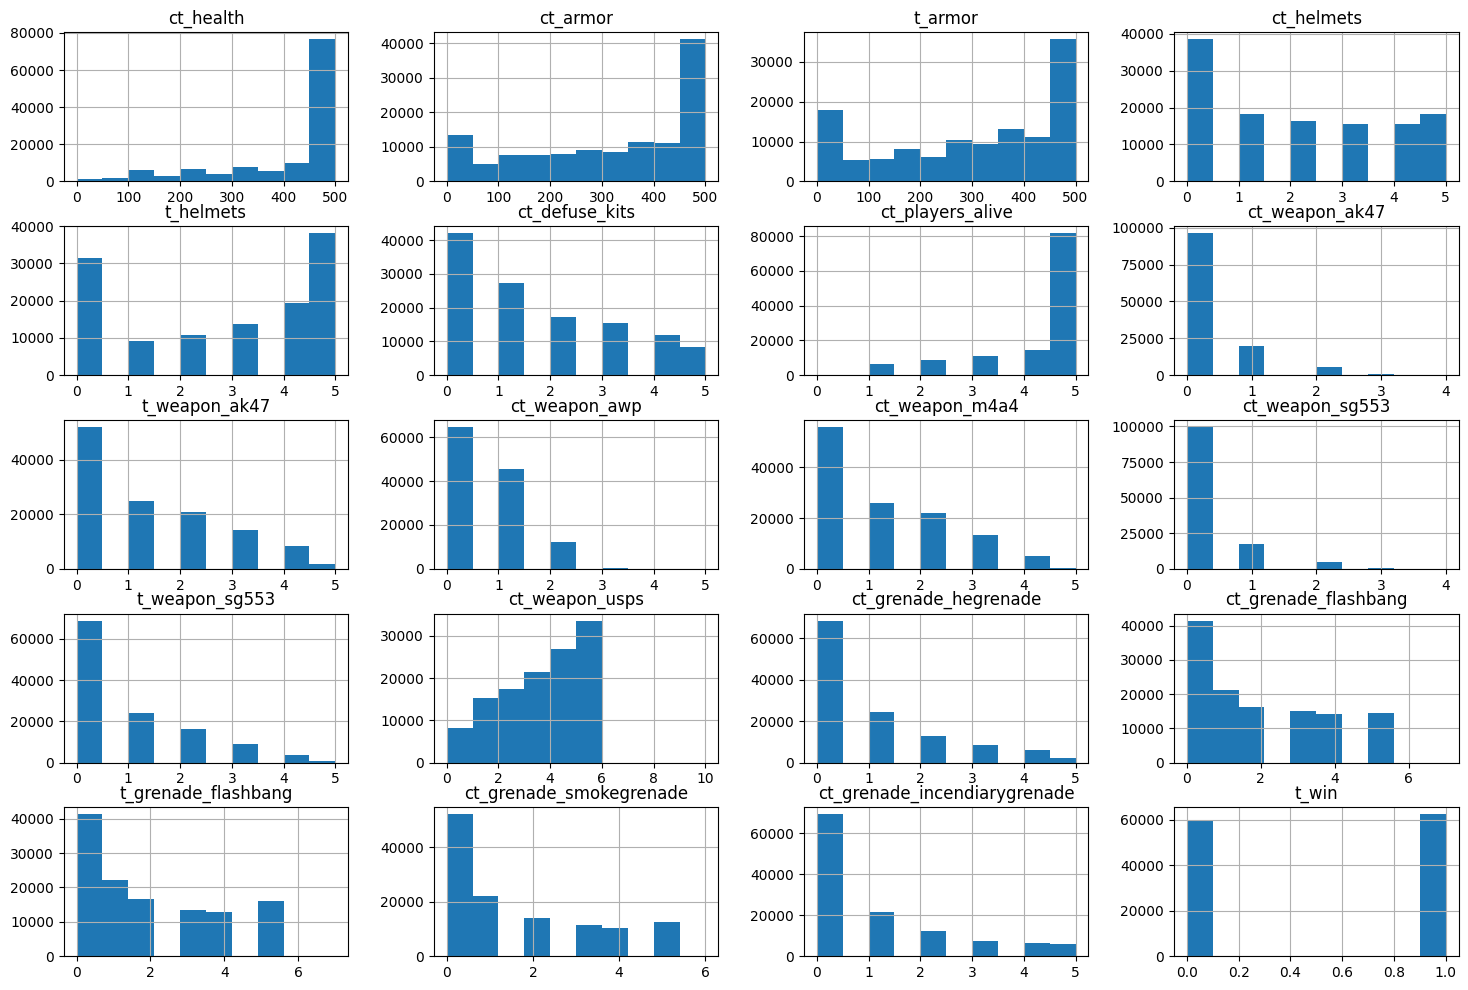

In [ ]:
df_selected.hist(figsize=(18, 12))
plt.savefig("histo.png")

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bomb_planted                  122410 non-null  bool   
 1   ct_health                     122410 non-null  float64
 2   ct_armor                      122410 non-null  float64
 3   t_armor                       122410 non-null  float64
 4   ct_helmets                    122410 non-null  float64
 5   t_helmets                     122410 non-null  float64
 6   ct_defuse_kits                122410 non-null  float64
 7   ct_players_alive              122410 non-null  float64
 8   ct_weapon_ak47                122410 non-null  float64
 9   t_weapon_ak47                 122410 non-null  float64
 10  ct_weapon_awp                 122410 non-null  float64
 11  ct_weapon_m4a4                122410 non-null  float64
 12  ct_weapon_sg553               122410 non-nul

In [ ]:
df_selected.describe()

,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,412.106568,314.142121,298.444670,2.053901,2.773638,1.613724,4.273752,0.274602,1.243926,0.573695,1.076236,0.239147,0.824941,3.179789,0.899101,1.853157,1.858100,1.540814,1.001969,0.509811
std,132.293290,171.029736,174.576545,1.841470,2.010915,1.605780,1.205500,0.584092,1.363887,0.673249,1.219112,0.554073,1.139545,1.586788,1.281569,1.772791,1.794473,1.737804,1.458084,0.499906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,350.000000,194.000000,174.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.000000,377.000000,334.000000,2.000000,3.000000,1.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,500.000000,486.000000,468.000000,4.000000,5.000000,3.000000,5.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000,5.000000,1.000000,3.000000,3.000000,3.000000,2.000000,1.000000
max,500.000000,500.000000,500.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,10.000000,5.000000,7.000000,7.000000,6.000000,5.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_selected.drop(["t_win"], axis=1), df_selected["t_win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test_scaled, y_test)

0.7633363287313129

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    "n_neighbors": list(range(5, 17, 2)),
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier(n_jobs=-1)

clf = RandomizedSearchCV(knn, param_grid, n_jobs=-1, n_iter=3, verbose=2, cv=3)
clf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [ ]:
clf.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=7, weights='distance')

In [ ]:
clf.best_estimator_.score(X_test_scaled, y_test)

0.7816354872967894

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=-1)

forest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
forest.score(X_test_scaled, y_test)

0.8296299321950821

In [ ]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(20,)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)


model.fit(X_train_scaled_train, y_train_train, epochs=30, callbacks=[early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/30
2602/2602 [==============================] - 20s 7ms/step - loss: 0.4800 - accuracy: 0.7392 - val_loss: 0.4763 - val_accuracy: 0.7426
Epoch 2/30
2602/2602 [==============================] - 7s 3ms/step - loss: 0.4691 - accuracy: 0.7477 - val_loss: 0.4727 - val_accuracy: 0.7461
Epoch 3/30
2602/2602 [==============================] - 9s 3ms/step - loss: 0.4651 - accuracy: 0.7502 - val_loss: 0.4765 - val_accuracy: 0.7453
Epoch 4/30
2602/2602 [==============================] - 11s 4ms/step - loss: 0.4628 - accuracy: 0.7505 - val_loss: 0.4684 - val_accuracy: 0.7453
Epoch 5/30
2602/2602 [==============================] - 8s 3ms/step - loss: 0.4602 - accuracy: 0.7528 - val_loss: 0.4679 - val_accuracy: 0.7462
Epoch 6/30
2602/2602 [==============================] - 9s 3ms/step - loss: 0.4578 - accuracy: 0.7548 - val_loss: 0.4662 - val_accuracy: 0.7467
Epoch 7/30
2602/2602 [==============================] - 9s 3ms/step - loss: 0.4546 - accuracy: 0.7576 - val_loss: 0.4680 - val_accurac

In [ ]:
model.evaluate(X_test_scaled, y_test)

766/766 [==============================] - 1s 2ms/step - loss: 0.4775 - accuracy: 0.7567


[0.4774637818336487, 0.7566784024238586]

In [ ]:
model.save("200_100_100_csgo.h5")

In [ ]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(20,)))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)


model.fit(X_train_scaled_train, y_train_train, epochs=30, callbacks=[early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/30
2602/2602 [==============================] - 8s 2ms/step - loss: 0.4861 - accuracy: 0.7377 - val_loss: 0.4718 - val_accuracy: 0.7427
Epoch 2/30
2602/2602 [==============================] - 7s 3ms/step - loss: 0.4721 - accuracy: 0.7448 - val_loss: 0.4686 - val_accuracy: 0.7445
Epoch 3/30
2602/2602 [==============================] - 6s 2ms/step - loss: 0.4684 - accuracy: 0.7478 - val_loss: 0.4646 - val_accuracy: 0.7517
Epoch 4/30
2602/2602 [==============================] - 6s 2ms/step - loss: 0.4655 - accuracy: 0.7487 - val_loss: 0.4638 - val_accuracy: 0.7471
Epoch 5/30
2602/2602 [==============================] - 6s 2ms/step - loss: 0.4636 - accuracy: 0.7513 - val_loss: 0.4629 - val_accuracy: 0.7519
Epoch 6/30
2602/2602 [==============================] - 6s 2ms/step - loss: 0.4620 - accuracy: 0.7517 - val_loss: 0.4619 - val_accuracy: 0.7505
Epoch 7/30
2602/2602 [==============================] - 6s 2ms/step - loss: 0.4610 - accuracy: 0.7526 - val_loss: 0.4639 - val_accuracy:

In [ ]:
model.evaluate(X_test_scaled, y_test)

766/766 [==============================] - 1s 2ms/step - loss: 0.4625 - accuracy: 0.7514


[0.4625087380409241, 0.7514091730117798]